### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [3]:
# Import all the neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

from sklearn import datasets 
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [6]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [7]:
# Basic descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


The 'reviews' dataframe has been sense checked and now have a better understanding of the description of the data, highlighting that there are no missing values in the data for each column. Also viewing the column names to also better understand the data.

## 2. Drop columns

In [8]:
# Drop unnecessary columns
reviews = reviews.drop(columns=['language', 'platform'])

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [9]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

The dataframe has been cleaned and can now be used to perfom analysis techniques through the erasing of unwanted columns, and renaming columns for easier reference. 

## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv')

In [11]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
reviews.head()

# Drop unnecessary columns
reviews = reviews.drop(columns='Unnamed: 0')

# View Dataframe
reviews.head()


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

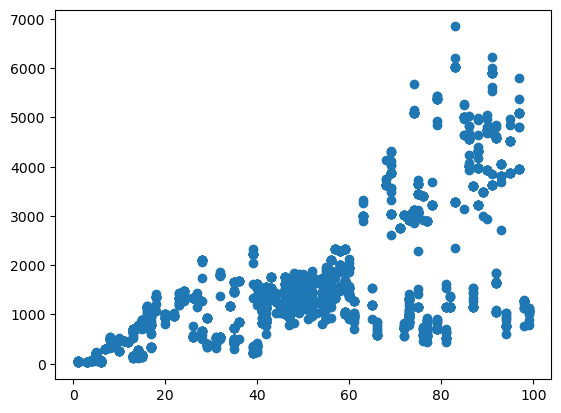

In [12]:
# Define independent variable.
x = reviews['spending_score'].values.reshape(-1, 1) 

# Define dependent variable.
y = reviews['loyalty_points'].values.reshape(-1, 1) 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

The scatterplot helps answer the assumption of linerity. This assumption states that there is a linear relationship between each predictor variable and the response variabl and this scatter plot demonstrates linearity.

In [13]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)



To evaluate the performance or accuracy of the linear regression model, it is good practice to train the model on a subset of the data and then predict on the holdout set. This approach allowed for comparison of the accuracy of the predictions against the observed values. 70% of the data to train the model and tested the model on the remaining 30%.

In [14]:
#Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x,y)

LinearRegression()

In [15]:
# Fit the model once again with the train data
lm.fit(x_train, y_train)

LinearRegression()

In [16]:
# Predict the training set values.
y_pred = lm.predict(x_train)

#View the output
y_pred

array([[ 478.59097135],
       [2762.05748635],
       [2497.30774548],
       ...,
       [1769.24595809],
       [1603.77737005],
       [1074.27788831]])

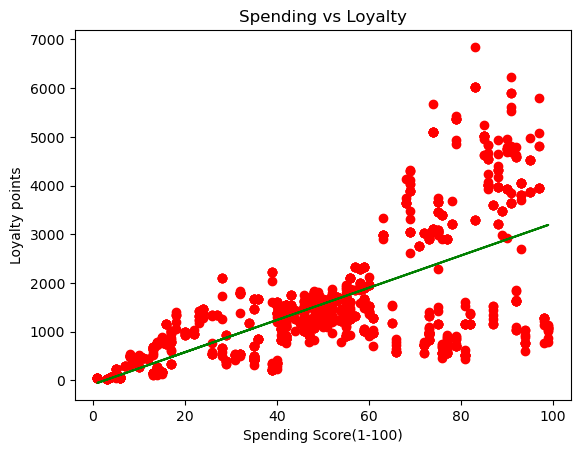

In [17]:
# Plot the graph with a regression line for the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, y_pred, color = 'green')
plt.title("Spending vs Loyalty")
plt.xlabel("Spending Score(1-100)")
plt.ylabel("Loyalty points")

plt.show()

The output displays the regression model for the training set of data for the spending score data. I can now make a prediction or test the spending scores to determine whether the simple linear regression model is correct. 

In [18]:
# Print R-squared value of the train data.
print('R-squared value: ', lm.score(x_train,y_train))

#Print the intercept value
print('Intercept value: ', lm.intercept_)

#Print the coefficient value.
print('Coefficient value: ', lm.coef_)

R-squared value:  0.4482106227872892
Intercept value:  [-84.002228]
Coefficient value:  [[33.09371761]]


The R-squared value is a statistical measure,which indicates the proportion of the total variation in the loyalty points that is explained or accounted for, by the total variation in the spending score.

The R-squared value is 0.45, which provides a measure of how well the loyalty points can be predicted from the spending score, meaning it is relatively not a good fit and explains 45% of the loyalty points.

The intercept value is -84 which is the point that the regression line intercepts the y-axis.

The coeffcient value is 33.09371 which tells us that each additional spending score is associated with an increase in 33.09371 loyalty points.

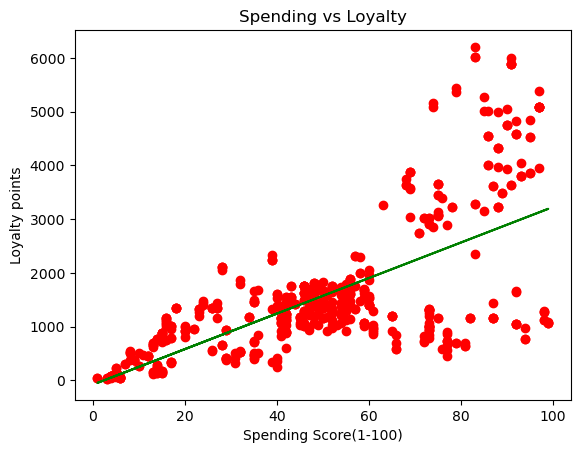

In [19]:
# Predict the test set values.
y_pred_test = lm.predict(x_test)

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred_test, color = 'green')
plt.title("Spending vs Loyalty")
plt.xlabel("Spending Score(1-100)")
plt.ylabel("Loyalty points")

# Print the graph. 
plt.show() 

The output displays the regression model for the testing set of data for the spending score data, which shows that the model is working.

The model is then compared with the OLS method which uses an R-style formula in Python to fit statistical models. 

By using OLS and the statsmodels module, I am able to minimise the residuals and create a more accurate line of best fit. With a bigger data set, the OLS method is more reliable and easier to use.

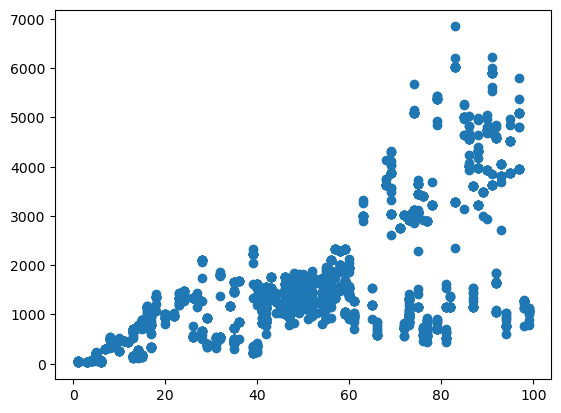

In [20]:
# Define independent variable.
x = reviews['spending_score']

# Define dependent variable.
y = reviews['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

The scatterplot helps answer the assumption of linerity. This assumption states that there is a linear relationship between each predictor variable and the response variable and this scatter plot demonstrates linearity.

In [21]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 19 May 2024   Prob (F-statistic):          2.92e-263
Time:                        20:36:42   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output gives all the necessary information to understand the model. With values such as the coefficient of x(33.0617) which describes the slope of the regression line.

R-squared is 0.452, indicating that around 45% of the observed variation can be explained by the model's inputs.

In [22]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


Estimated parameters, standard errors, and predicted valuesare displayed individually by using the print() function and docstrings for clarity.

The output is long but shows the intercept, coefficient, standard errors, and a list of estimated values of the loyalty points (dependant variable).

In [23]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y_pred = (-75.052663) + (33.061693) * reviews['spending_score']

# View the output.
y_pred


0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

The simple linear regression model has been created. There are now predicted dependent values (Loyalty points) for each independent value (Spending Score) based on the simple linear regression model.

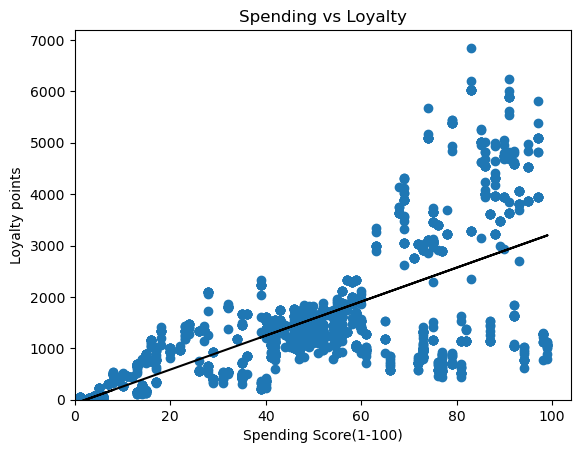

In [24]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, y_pred, color = 'black')
plt.title("Spending vs Loyalty")
plt.xlabel("Spending Score(1-100)")
plt.ylabel("Loyalty points")

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()


Visualisation of simple linear regression model with aim of trying to find the line of best fit by minimising residuals; by reducing the distance between the data points and the regression line down to zero. The line of best fit fits the scatter indicating a relatively positve correlation, whilst also keeping in mind that there could be potential outliers which fall outside confidence bands. However this is one of the limitations to linear regression with sensitivity to ouliers being apparent especailly, when the spending score starts to exceed past 60 and the data points start to become more steep after this point. This can be used to predict the trend that after a spending score of 60-100, loyalty points will start to rapidly increase at a faster rate than before this spending score.

This can provide valuable insights into how a customers spending score and loyalty points are related and a postive correlation makes sense as the more a customer spends, the greater the number of loyalty points which relates to a customers spending.

Also comparing the OLS method with the test and train visualisation we can spot some consistency in the shape of the graph with the distinct differences coming from the regression line in particualar the y-intercept OLS( around -75) and test-train( around-84). Which clearly show some minor disparities however the coeffcient of x showed to lie within the same region for both models(33).

### 5b) renumeration vs loyalty

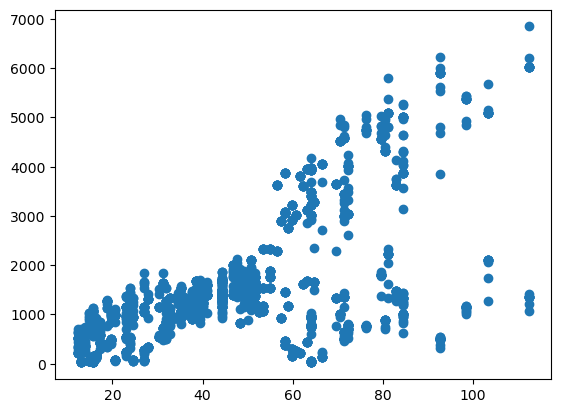

In [25]:
# Define independent variable.
x = reviews['remuneration']

# Define dependent variable.
y = reviews['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

The scatterplot helps answer the assumption of linerity. This assumption states that there is a linear relationship between each predictor variable and the response variable and this scatter plot demonstrates linearity.

In [26]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 19 May 2024   Prob (F-statistic):          2.43e-209
Time:                        20:36:42   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output gives all the necessary information to understand the model. With values such as the coefficient of x(34.1878) which describes the slope of the regression line.

R-squared is 0.38, indicating that around 38% of the observed variation can be explained by the model's inputs, which isn't very strong.

In [27]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


Estimated parameters, standard errors, and predicted values are displayed individually by using the print() function and docstrings for clarity.

The output is long but shows the intercept, coefficient, standard errors, and a list of estimated values of the loyalty points (dependant variable).

In [28]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y_pred = (-65.6865) + (34.187825) * reviews['remuneration']

# View the output.
y_pred


0        354.823747
1        354.823747
2        382.857764
3        382.857764
4        410.891780
           ...     
1995    2821.817199
1996    3102.157364
1997    3102.157364
1998    3298.395480
1999    3102.157364
Name: remuneration, Length: 2000, dtype: float64

The simple linear regression model has been created. There are now predicted dependent values (Loyalty points) for each independent value (Renumeration) based on the simple linear regression model.

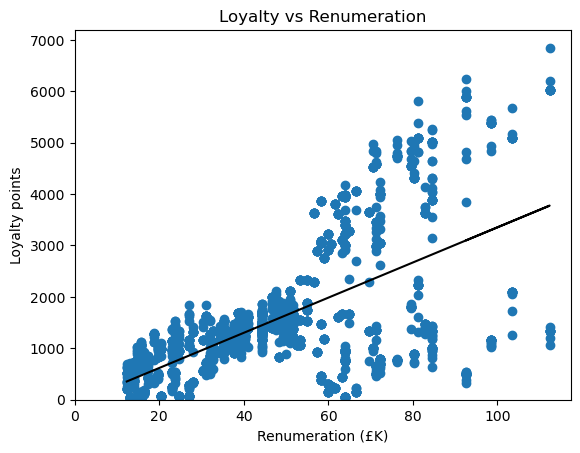

In [29]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, y_pred, color = 'black')
plt.title("Loyalty vs Renumeration")
plt.xlabel("Renumeration (£K)")
plt.ylabel("Loyalty points")

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()



Visualisation of simple linear regression model with aim of trying to find the line of best fit by minimising residuals; by reducing the distance between the data points and the regression line down to zero. The line of best fit fits the scatter indicating a relatively positve correlation, whilst also keeping in mind that there could be potential outliers which fall outside confidence bands it's likely there's something unique making it do so. This is evident more than ever when for renumeration values over 80 and loyalty points over 4000, which could show a potential trend. 

This can provide valuable insights into how a customers renumeration and loyalty points are related and a postive correlation makes sense as the higher a customers renumeration, the greater the number of loyalty points which relates to a customers finacial ability to spend more which in turn accumalates more loyalty points. However potenital outliers can create a question on the RHS of the regression line, where the higher a customers Total income per customer per year, the lower a customers loyalty points. We can look in more detail if there are reasons for this trend such as customers not being repeat customersf and make suggestions target this demographic and combat this to get more customers with a higher renumeration to increase their number of loyalty points as they have the funds to achieve this.

However this is one of the limitations to linear regression with sensitivity to ouliers being apparent especailly, when the renumeration starts to exceed past 60(£K) and the data points start to become more steep after this point as the loyalty points increase. This can be used to predict the trend that after a renumeration of 60-100, loyalty points will start to rapidly increase at a faster rate than before this spending score. However there are some outliers with renumeration values closer to 100 and a decreasing number of loyalty points.

### 5c) age vs loyalty

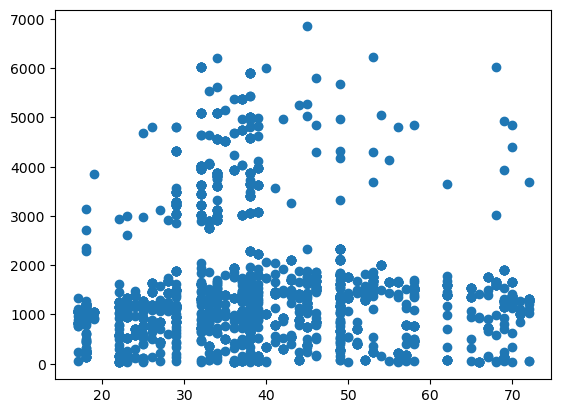

In [30]:
# Define independent variable.
x = reviews['age'].values.reshape(-1, 1) 

# Define dependent variable.
y = reviews['loyalty_points'].values.reshape(-1, 1) 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

The scatterplot helps answer the assumption of linerity. This assumption states that there is a linear relationship between each predictor variable and the response variable and this scatter plot does not display linearity. The points in the scatter plot do not follow a diagonal line indicating that there might not be a linear relationship between the variables.

In [31]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 19 May 2024   Prob (F-statistic):             0.0577
Time:                        20:36:42   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output gives all the necessary information to understand the model. With values such as the coefficient of x(-4.0128) which describes the slope of the regression line.

R-squared is 0.002, indicating that around 0.2% of the observed variation can be explained by the model's inputs, which isn't extremly weak, which is evident by the scatter plot created above. 

In [32]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


Estimated parameters, standard errors, and predicted values are displayed individually by using the print() function and docstrings for clarity.

The output is long but shows the intercept, coefficient, standard errors, and a list of estimated values of the loyalty points (dependant variable).

In [33]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y_pred = (1736.5177) + (-4.0128) * reviews['age']

# View the output.
y_pred


0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

The simple linear regression model has been created. There are now predicted dependent values (Loyalty points) for each independent value (age) based on the simple linear regression model.

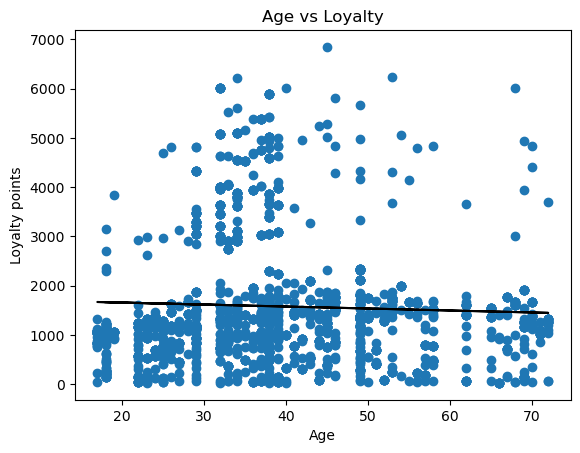

In [34]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, y_pred, color = 'black')
plt.title("Age vs Loyalty")
plt.xlabel("Age")
plt.ylabel("Loyalty points")

plt.show()

Visualisation of simple linear regression model with aim of trying to find the line of best fit by minimising residuals; by reducing the distance between the data points and the regression line down to zero. The line of best fit isn't diagonal and there is no correlation between the age and loyalty points clearly indication that there is no trend or patterns to comment on between the two variables. This model also goes against the assumption of linearity and potential suggestions to uncover a relationship between the loyalty points and age, could be to add another independent variable to the model.

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [35]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
import math

from sklearn import metrics
from sklearn.model_selection import train_test_split

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [36]:
# Create your new DataFrame.
df2 = pd.read_csv('turtle_reviews_clean.csv')

#View the dataframe
print(df2.info())
df2.head()

# Drop unnecessary columns
df2 = df2.drop(columns=['Unnamed: 0','review', 'summary'])

#View the dataframe
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


,gender,age,remuneration,spending_score,loyalty_points,education,product
0,Male,18,12.30,39,210,graduate,453
1,Male,23,12.30,81,524,graduate,466
2,Female,22,13.12,6,40,graduate,254
3,Female,25,13.12,77,562,graduate,263
4,Female,33,13.94,40,366,graduate,291


In [37]:
# Specify the DataFrame column, and add/determine the values.
df2['education'].value_counts()

education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64

In [38]:
#The order of the edu column is meaningful and the order matters , so apply LabelEncoder to this column
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d
import pandas as pd
import numpy as np

In [39]:
#Create a class and write a user defined function
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self
    
# Order lists of the values for the edu column
Edu_order = ['Basic', 'diploma', 'graduate', 'postgraduate', 'phD']

#Create an instance of MyLabelEncoder
le = MyLabelEncoder()

# Fit the encoder with the ordered values.
le.fit(Edu_order)

# Apply the LabelEncoder to the Edu column in the dataframe
df2['education'] = le.fit_transform(df2['education'])

# View the dataframe
print(df2.head())

   gender  age  remuneration  spending_score  loyalty_points  education  \
0    Male   18         12.30              39             210          3   
1    Male   23         12.30              81             524          3   
2  Female   22         13.12               6              40          3   
3  Female   25         13.12              77             562          3   
4  Female   33         13.94              40             366          3   

   product  
0      453  
1      466  
2      254  
3      263  
4      291  


In [40]:
# Specify the dataframe column and add/determine the values.
df2['gender'].value_counts()

gender
Female    1120
Male       880
Name: count, dtype: int64

In [41]:
#Create a class and write a user defined function
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self
    
# Create a list of the values for the gender column
gen = ['Male','Female']

#Create an instance of MyLabelEncoder
le = MyLabelEncoder()

# Fit the encoder with the ordered values.
le.fit(gen)

# Apply the LabelEncoder to the gender column in the dataframe
df2['gender'] = le.fit_transform(df2['gender'])

# View the dataframe
print(df2.head())

   gender  age  remuneration  spending_score  loyalty_points  education  \
0       1   18         12.30              39             210          3   
1       1   23         12.30              81             524          3   
2       0   22         13.12               6              40          3   
3       0   25         13.12              77             562          3   
4       0   33         13.94              40             366          3   

   product  
0      453  
1      466  
2      254  
3      263  
4      291  


In [42]:
# Specify that the column Loyalty points
# should be moved into a seperate dataframe
cols = df2.columns[df2.columns !='loyalty_points']

# Specify X and Y.
X = df2[cols]
y = df2['loyalty_points']


In [43]:
# Review X and Y.
print(X.head())
y

   gender  age  remuneration  spending_score  education  product
0       1   18         12.30              39          3      453
1       1   23         12.30              81          3      466
2       0   22         13.12               6          3      254
3       0   25         13.12              77          3      263
4       0   33         13.94              40          3      291


0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty_points, Length: 2000, dtype: int64

## 2. Create train and test data sets.

In [44]:
# Split the data into test and train data.
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=42)

## 3. Create Decision tree regressor

In [45]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)  

DecisionTreeRegressor(random_state=42)

In [46]:
# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict))
# Calculate the RMSE.
print("Root Mean Squared Error: ", 
     math.sqrt(metrics.mean_squared_error(y_test, y_predict)))  


Mean Absolute Error:  36.155
Mean Squared Error:  9506.235
Root Mean Squared Error:  97.49992307689274


In [47]:
# Prune the tree by setting max_depth
pruned_regressor = DecisionTreeRegressor(max_depth=3, random_state=20)
pruned_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_pruned = pruned_regressor.predict(X_test)


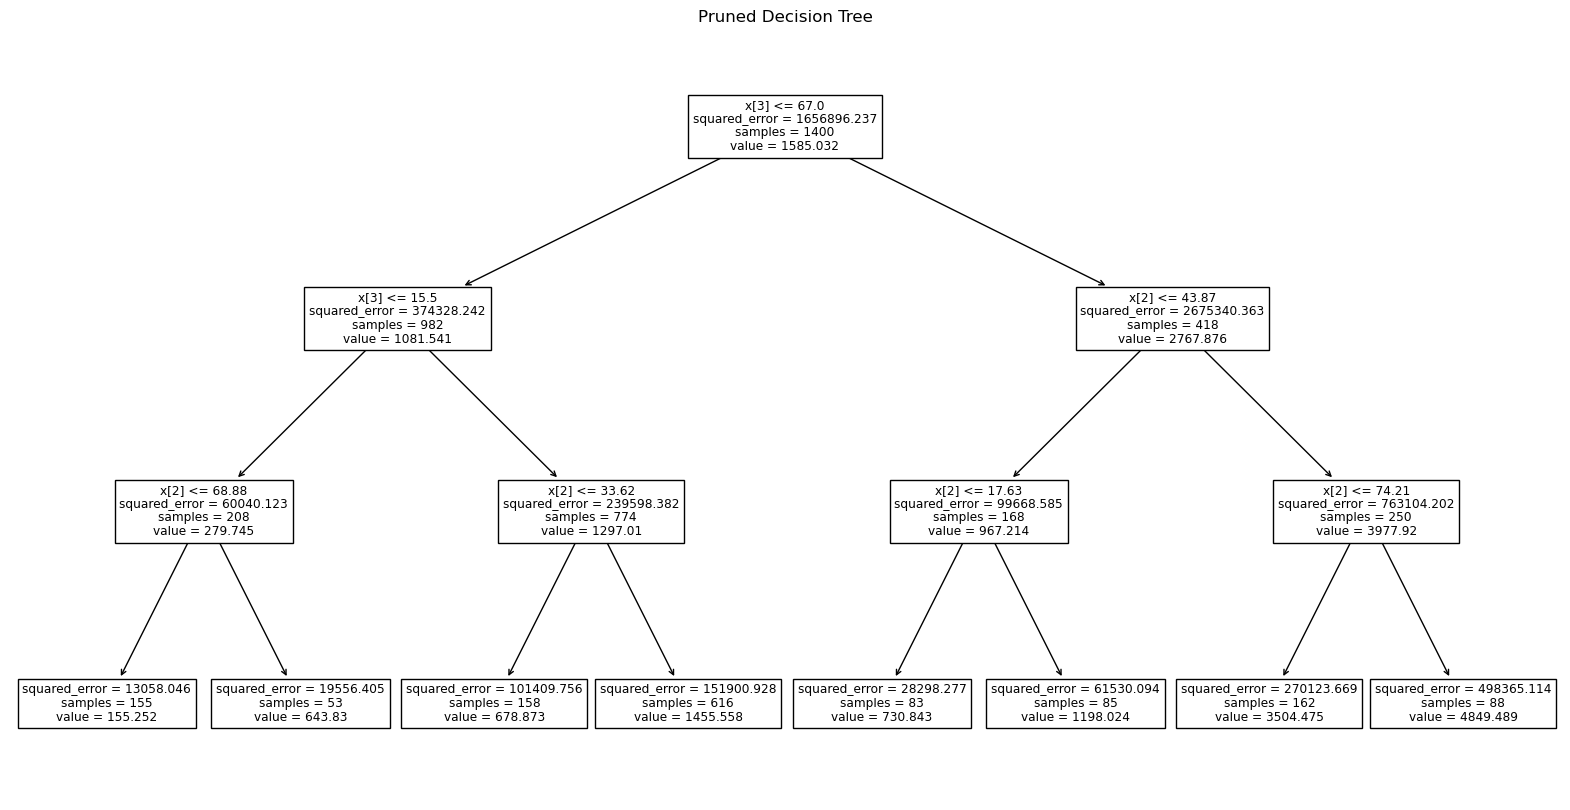

In [48]:
plt.figure(figsize=(20, 10))  # Set the figure size for better visualization
plot_tree(pruned_regressor)
plt.title("Pruned Decision Tree")
plt.show()

## 5. Discuss: Insights and observations

***Your observations here...***

In [49]:
# Interpret model and note observations.


# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [50]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [51]:
# Create new dataframe and drop unnecessary columns.
df3 = df2.drop(columns=['age', 'loyalty_points','education', 'product'])
# View DataFrame.
print(df3.info())
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   int64  
 1   remuneration    2000 non-null   float64
 2   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB
None


,gender,remuneration,spending_score
0,1,12.30,39
1,1,12.30,81
2,0,13.12,6
3,0,13.12,77
4,0,13.94,40


In [52]:
# Explore the data.
# Determine the number of null values.
df3.isnull().sum()

gender            0
remuneration      0
spending_score    0
dtype: int64

In [53]:
# Descriptive statistics.
df3.describe()

,gender,remuneration,spending_score
count,2000.000000,2000.000000,2000.000000
mean,0.440000,48.079060,50.000000
std,0.496511,23.123984,26.094702
min,0.000000,12.300000,1.000000
25%,0.000000,30.340000,32.000000
50%,0.000000,47.150000,50.000000
75%,1.000000,63.960000,73.000000
max,1.000000,112.340000,99.000000


The 'df3' dataframe has been sense checked and now have a better understanding of the description of the data, highlighting that there are no missing values in the data for each column. Also viewing the descriptive statistics to get a better understand the data.

## 2. Plot

<Axes: xlabel='remuneration', ylabel='spending_score'>

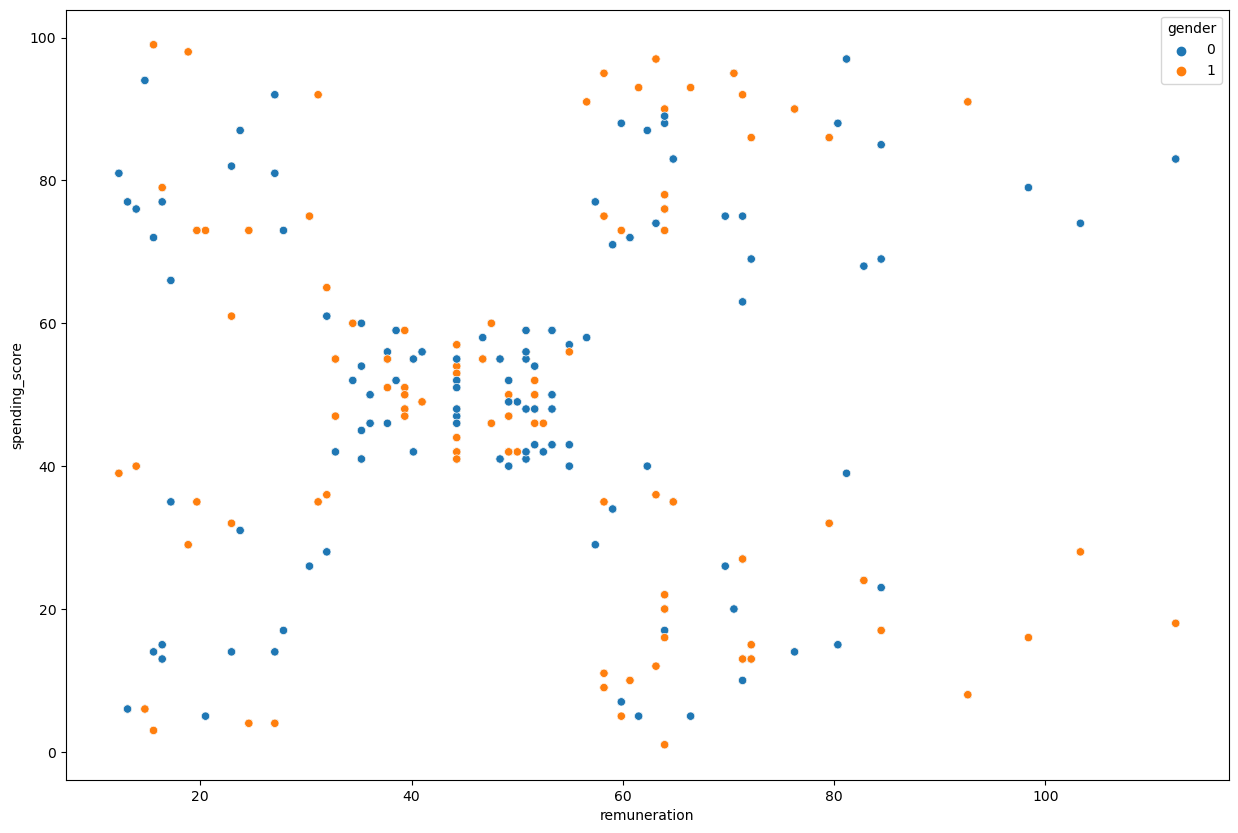

In [54]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                hue='gender',
                data=df3)

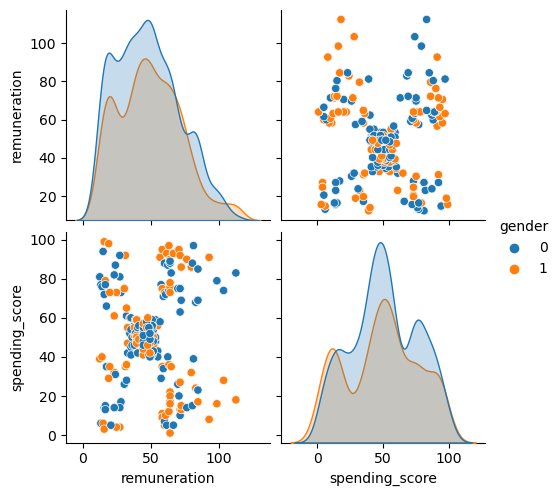

In [55]:
# Create a pairplot with Seaborn.
x = df3[['remuneration', 'spending_score']]

sns.pairplot(df3,
             vars=x,
             hue='gender',
             diag_kind= 'kde')

The hue has been set to gender to distinguish between customers with 0 = female and 1 = male.

The scatterplot and pairplot have been visualised to identify any possible correlations and groups between remuneration and spending score for different genders.

When comparing spending scores between genders intersting to point out that females have a higher spending score than men as the spending score increases.

## 3. Elbow and silhoutte methods

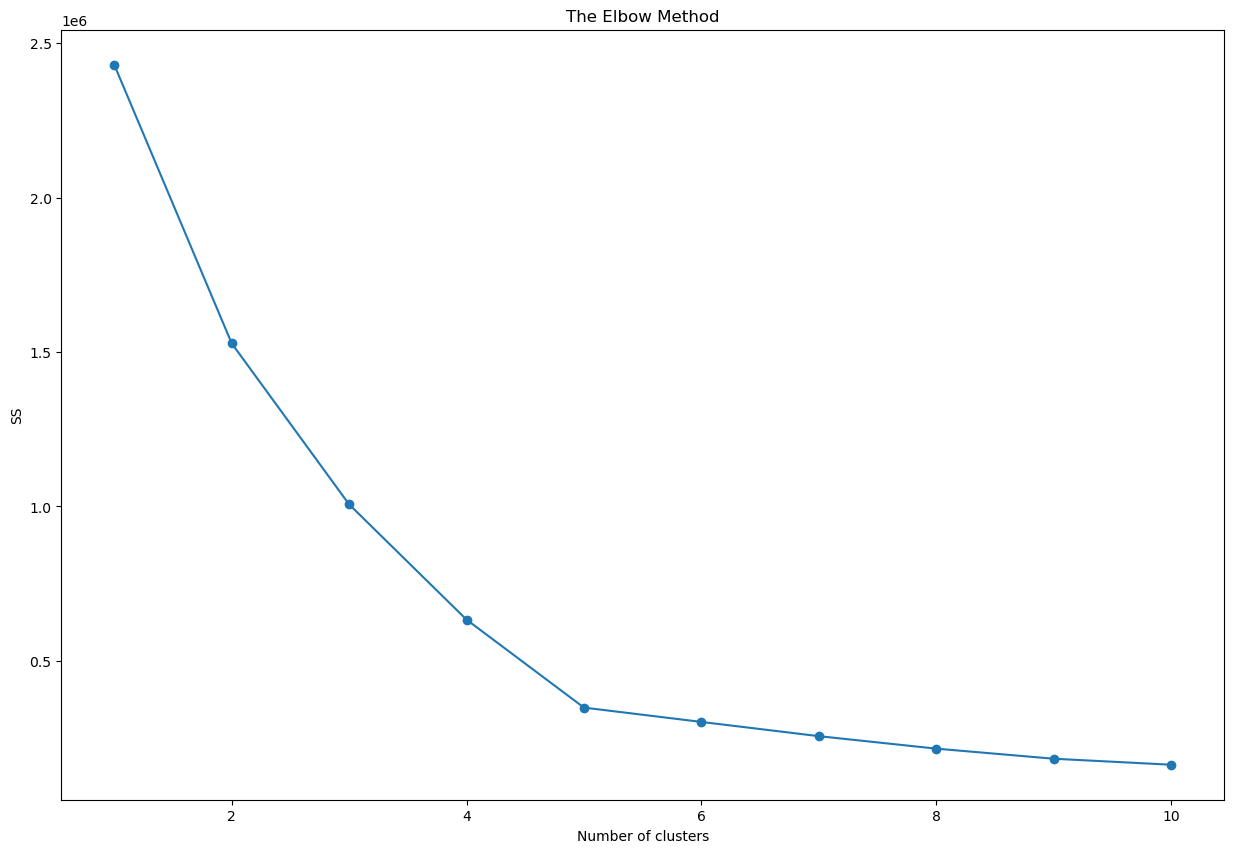

In [56]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

The elbow method is used to determine the optimal number of clusters. However, the elbow method doesn't always work well, especially if the data is not very clustered.

Graph shows elbow with approximate of 4 or 5 clusters considered to be optimal. The fewer clusters we have the greater the data reduction will be and vice versa,meaning have to find comprimise in the number of clusters and homogeneity and hetrogeneity within them.

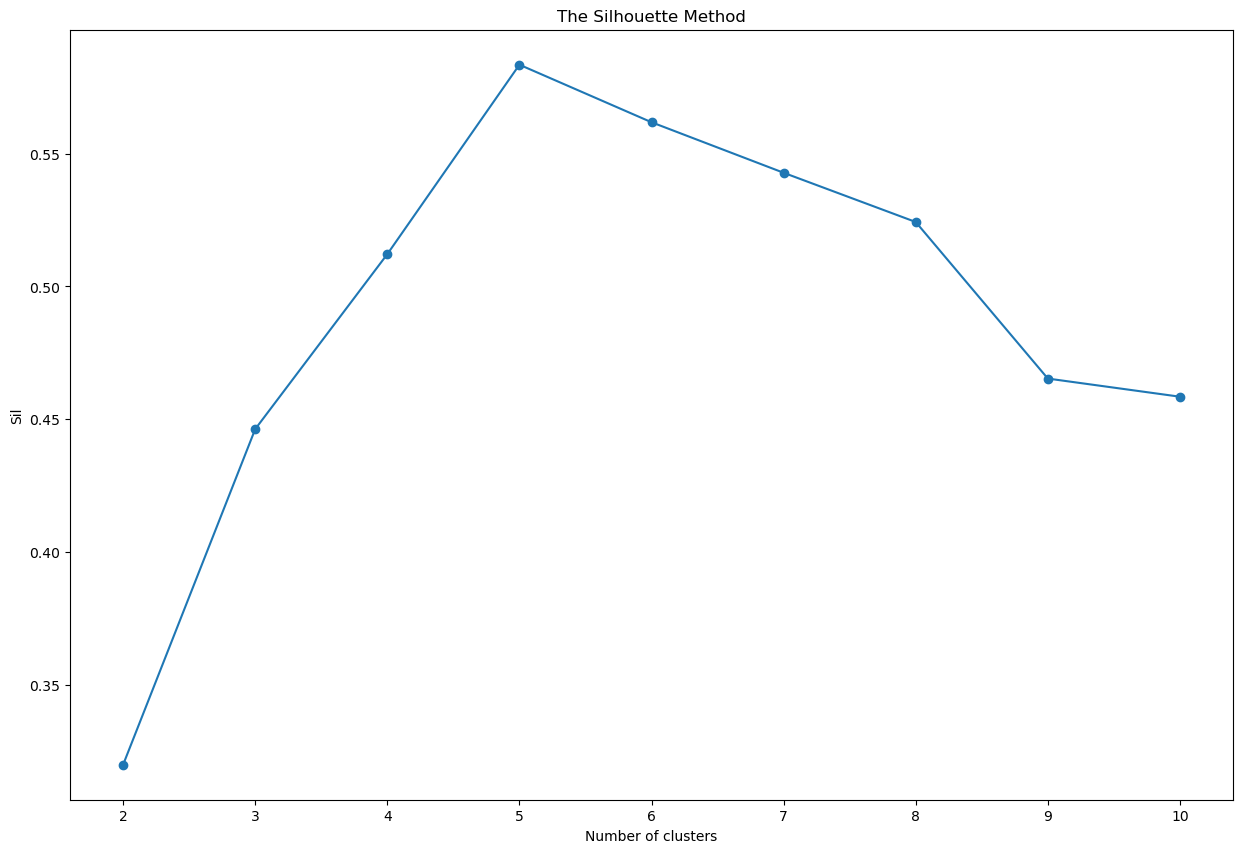

In [57]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

The silhouette methodgives a measure of similarity of the object of its assigned cluster of each point that measures how much a point is similar to its own cluster compared to other clusters. 

The closer the Sil is to 1 the better.

2 has the lowest average silhouette coeffcient.

From the graph note that 5 clusters may be preferrable to 4 by having a higher average silhouette coeffcient.

## 4. Evaluate k-means model at different values of *k*

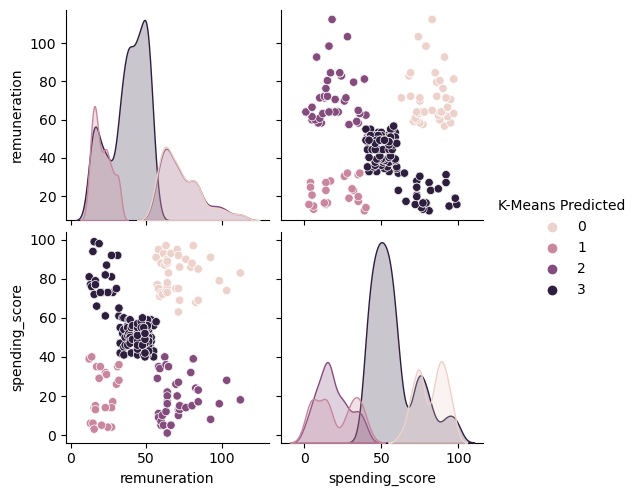

In [58]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

Based on all the objects assigned to these 4 cluster solutions we can see what the distribution of the spending score and renumeration are.

If we look at the remuneration we can see a limit of boundaries between the 4 clusters based on the remuneration values, but there are still gaps between clusters in remuneration and spending score.

In [59]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
3    1013
0     356
2     351
1     280
Name: count, dtype: int64

Returns the nunber of objects in each of the 4 clusters.

Misclassification due to cluster group 1 having considerably more objects than other clusters.

In [60]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  3
2         13.12               6                  1
3         13.12              77                  3
4         13.94              40                  1


In all the first 5 cases the classifications are split between cluster predicted 1 and 3. 

Remuneration is ranging between 12 and 14 and spending score has a larger range and is ranging from 6 to around 80. From looking at the pairplot to verify, the spending scores which are higher tend to be in cluster 1.

<Axes: xlabel='remuneration', ylabel='spending_score'>

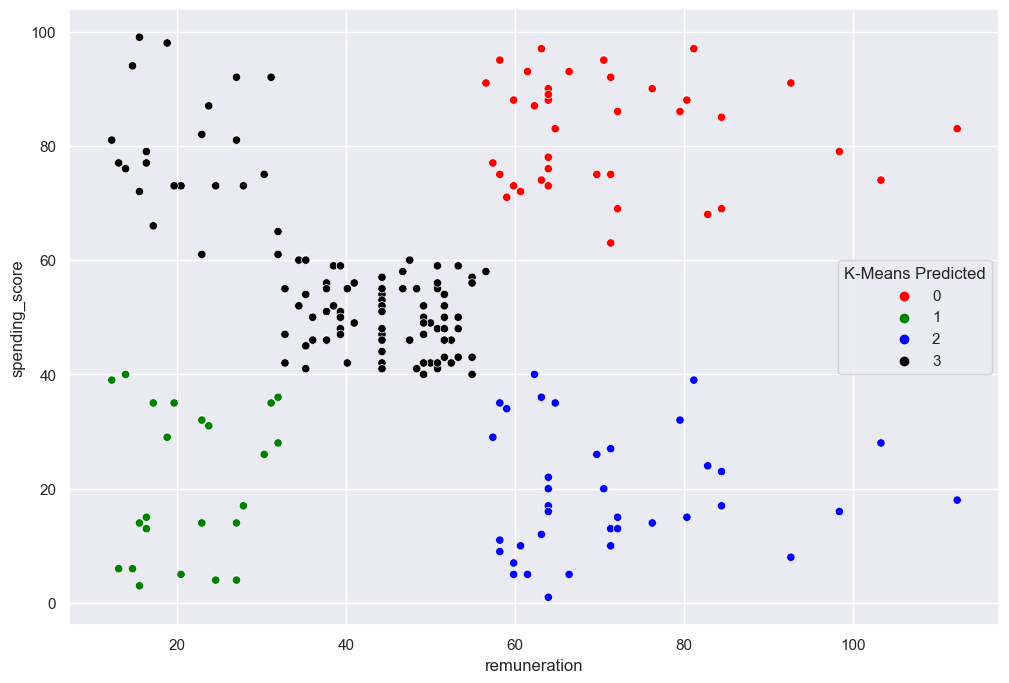

In [61]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration', 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

Scatterplot based on predictions of cluster membership we can see separation of the predicted types based on the different colours and the two attributes.

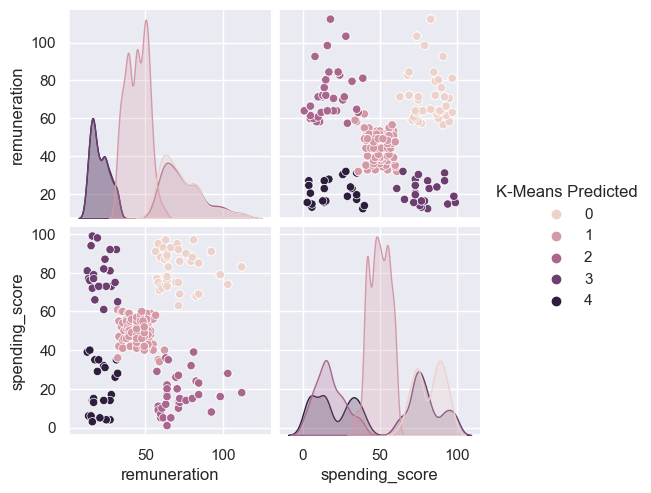

In [62]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

Based on all the objects assigned to these 5 cluster solutions we can see what the distribution of the spending score and renumeration are compared to 4 clusters.

If we look at the remuneration we can see a clearer limit of boundaries between the 5 clusters based on the remuneration values that is compared when using 4 clusters.

In [63]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

Returns the nunber of objects in each of the 5 clusters.

Less misclassification due to cluster group 1 having considerably more objects than other clusters but overall the objects are spread more evenly compared with 4 clusters.

In [64]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


Similar prediction patterns as highlighted in using 4 clusters.

<Axes: xlabel='remuneration', ylabel='spending_score'>

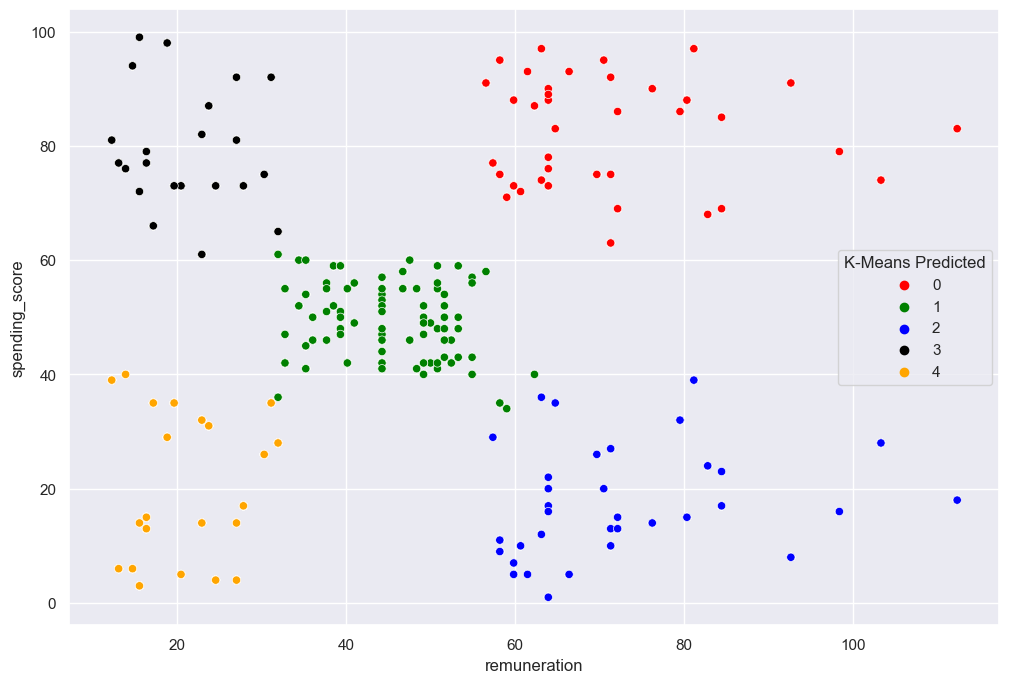

In [65]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration', 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black','orange'])


There is a fairly distinct natrual groupings of 5 clusters based on remuneration and spending score, so we wil use this cluster for analysis.

Cluster 0 is the largest group for both k=4 and k=5, which promotes objects that are homogenus. 

The number of predicted values per class indicates a better distribution for k=4 than k=5

All customers are not equal, however from analysing these clusters there is room for market segmentation and we can correlate groups of customers related to their spending score and correspond remuneration and target and profile these groups respectively.

Cluster 2 could be labelled as quality conscious consumers as they are grouped with having a relatively high remuneration but have a low spending score. This can tell a story that they may have the financial means to spend more on games but are not finding value in what is being offered to convince them to spend more. Marketing strategies can therefore be implemented to improve spending score for this group.

On the flip side cluster 4 could be labelled as price conscious consumers as they are grouped with having a relatively low remuneration as well as a low spending score. This can indicate that prices of certain games may be too high for this group . Marketing strategies could hand out promotional offers primarily for this group to incentivise them to increase their spending score with understanding of their financial situation.

# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [66]:
# Import all the necessary packages.
!pip install nltk
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
# Import nltk and download nltk's resources to assist with tokenisation AND stopwords.
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download ('stopwords')

from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/davidgandary/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidgandary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
# Load the data set with all the columns
reviews

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [68]:
# Keep necessary columns. Drop unnecessary columns.
df4 = reviews.drop(columns=['gender','age','remuneration','spending_score','loyalty_points','education','product'])

# View DataFrame.
print(df4.info())
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [69]:
# Determine if there are any missing values.
df4.isnull().sum()

review     0
summary    0
dtype: int64

The 'df4' dataframe has been sense checked and now have a better understanding of the description of the data, highlighting that there are no missing values in the data for each column. The dataframe only conrtains relevant text data which can be applied for sentimental analysis.

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [70]:
# Review: Change all to lower case and join with a space.
# Transform data to lowercase.
df4['review'] = df4['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [71]:
# Summary: Change all to lower case and join with a space.
# Transform data to lowercase.
df4['summary'] = df4['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [72]:
# Replace all the punctuations in review column.
import re
df4['review']=[re.sub('[^\w\s]+', '', s) for s in df4['review'].tolist()]

# Preview the result.
df4['review'].head()

# View output.
df4['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [73]:
# Replace all the puncuations in summary column.
import re
df4['summary']=[re.sub('[^\w\s]+', '', s) for s in df4['summary'].tolist()]

# View output.
df4['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [74]:
# Check the number of duplicate values in both columns.
print(df4.review.duplicated().sum())
print(df4.summary.duplicated().sum())

# Drop duplicates in columns.
df4 = df4.drop_duplicates(subset=['review'])
df4 = df4.drop_duplicates(subset=['summary'])

# View DataFrame.
df4.reset_index(inplace=True)
df4.head()

50
649


,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [75]:
# Create new DataFrame (copy DataFrame).
df4_copy = df4

# View DataFrame.
df4_copy.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [76]:
# Apply tokenisation to both columns.
df4_copy['review'] = df4_copy['review'].apply(word_tokenize)
df4_copy['summary'] = df4_copy['summary'].apply(word_tokenize)

# View DataFrame.
df4_copy.head()

,index,review,summary
0,0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


Tokenisation or text segmentation splits long strings into smaller pieces of text. The text is tokenised into words that are stored as a list. The output has defined each word individually so that each word is an item in the list data structure.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [77]:
# Define an empty list of tokens.
all_tokens_review = []

for i in range(df4_copy.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df4_copy['review'][i]

In [78]:
# Define an empty list of tokens.
all_tokens_summary = []

for i in range(df4_copy.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + df4_copy['summary'][i]

In [79]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution for review.
fdist_review = FreqDist(all_tokens_review)

# Preview data.
fdist_review

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

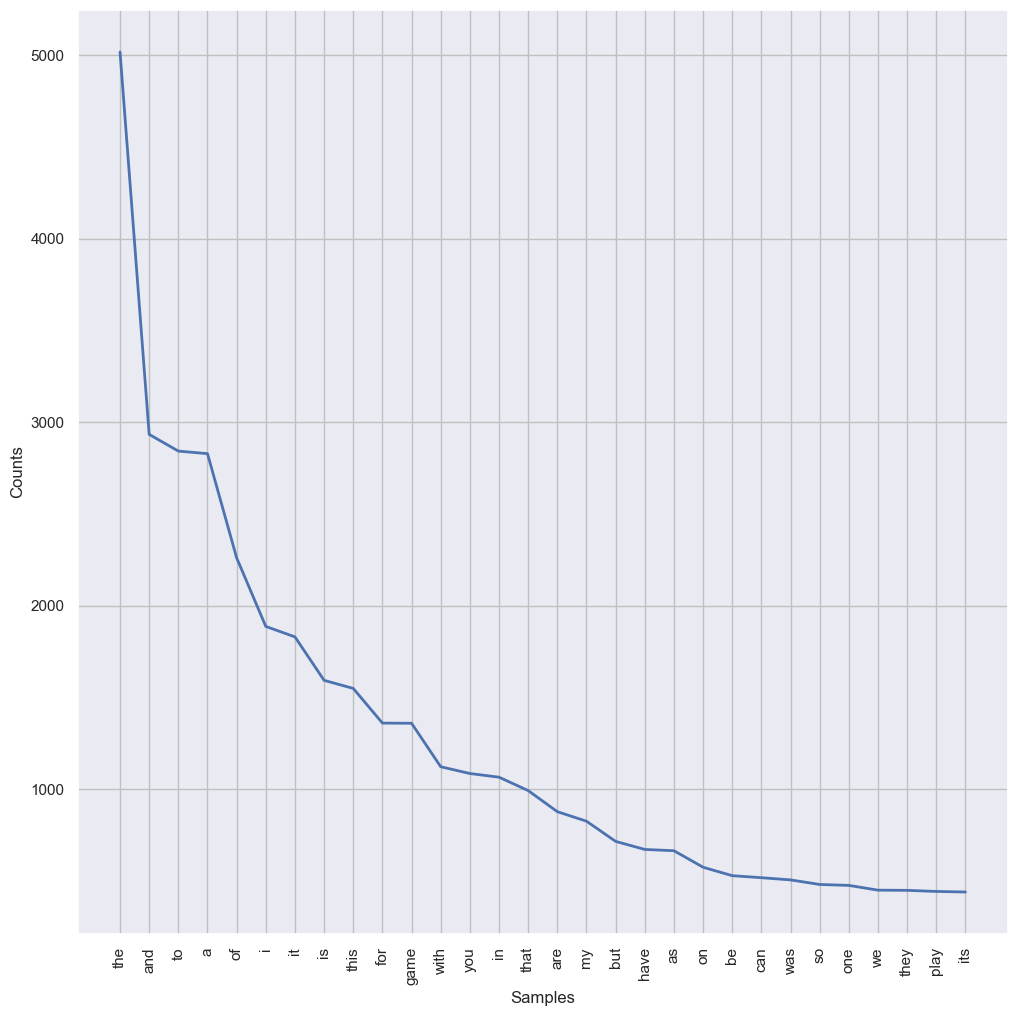

In [80]:
#Plot the frequency plot
# Define the figure and axes.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 12)

# Plot the data set.
fdist_review.plot(30, cumulative=False)

# Display the result.
plt.show()

The method returns the most common words and the frequency of each and a frequency plot has been visualised.

In [81]:
# Calculate the frequency distribution for summary.
fdist_summary = FreqDist(all_tokens_summary)

# Preview data.
fdist_summary

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

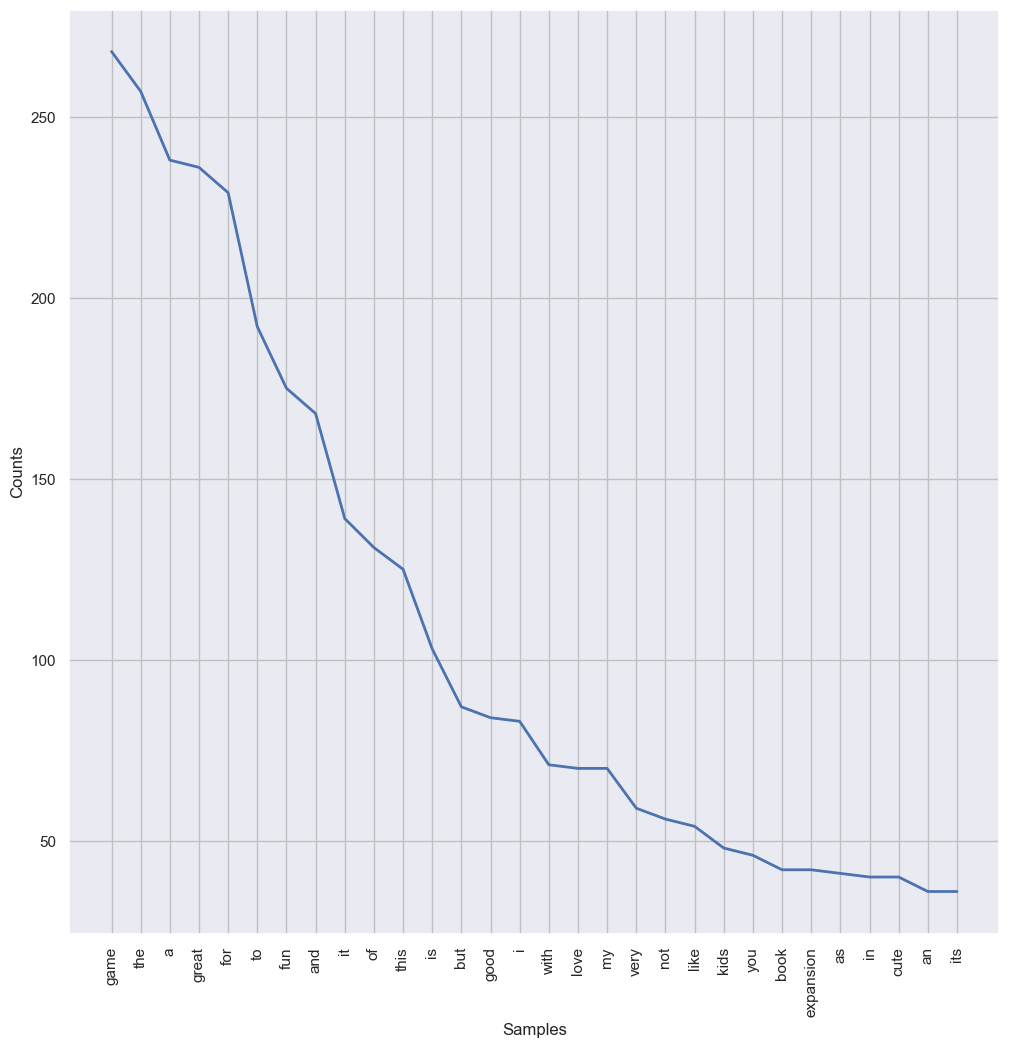

In [82]:
#Plot the frequency plot
# Define the figure and axes.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 12)

# Plot the data set.
fdist_summary.plot(30, cumulative=False)

# Display the result.
plt.show()

The method returns the most common words and the frequency of each a frequency plot has been visualised. However from both plots it is clear that the most frequent words don't tell an accurate story of the data, so we need to remove alphanumeric characters and stopwords.

### 4b) Remove alphanumeric characters and stopwords

In [83]:
# Delete all the alpanum.
tokens_review = [word for word in all_tokens_review if word.isalnum()]
tokens_summary =[word for word in all_tokens_summary if word.isalnum()]

In [84]:
# Remove all the stopwords
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords for reviews.
tokens_review2 = [x for x in tokens_review if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_review2_string = ''

for value in tokens_review:
    # Add each filtered token word to the string.
    tokens_review2_string = tokens_review2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidgandary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords for reviews.
tokens_summary2 = [x for x in tokens_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_summary2_string = ''

for value in tokens_summary:
    # Add each filtered token word to the string.
    tokens_summary2_string = tokens_summary2_string + value + ' '

The output indicates a list without any stopwords. 

### 4c) Create wordcloud without stopwords

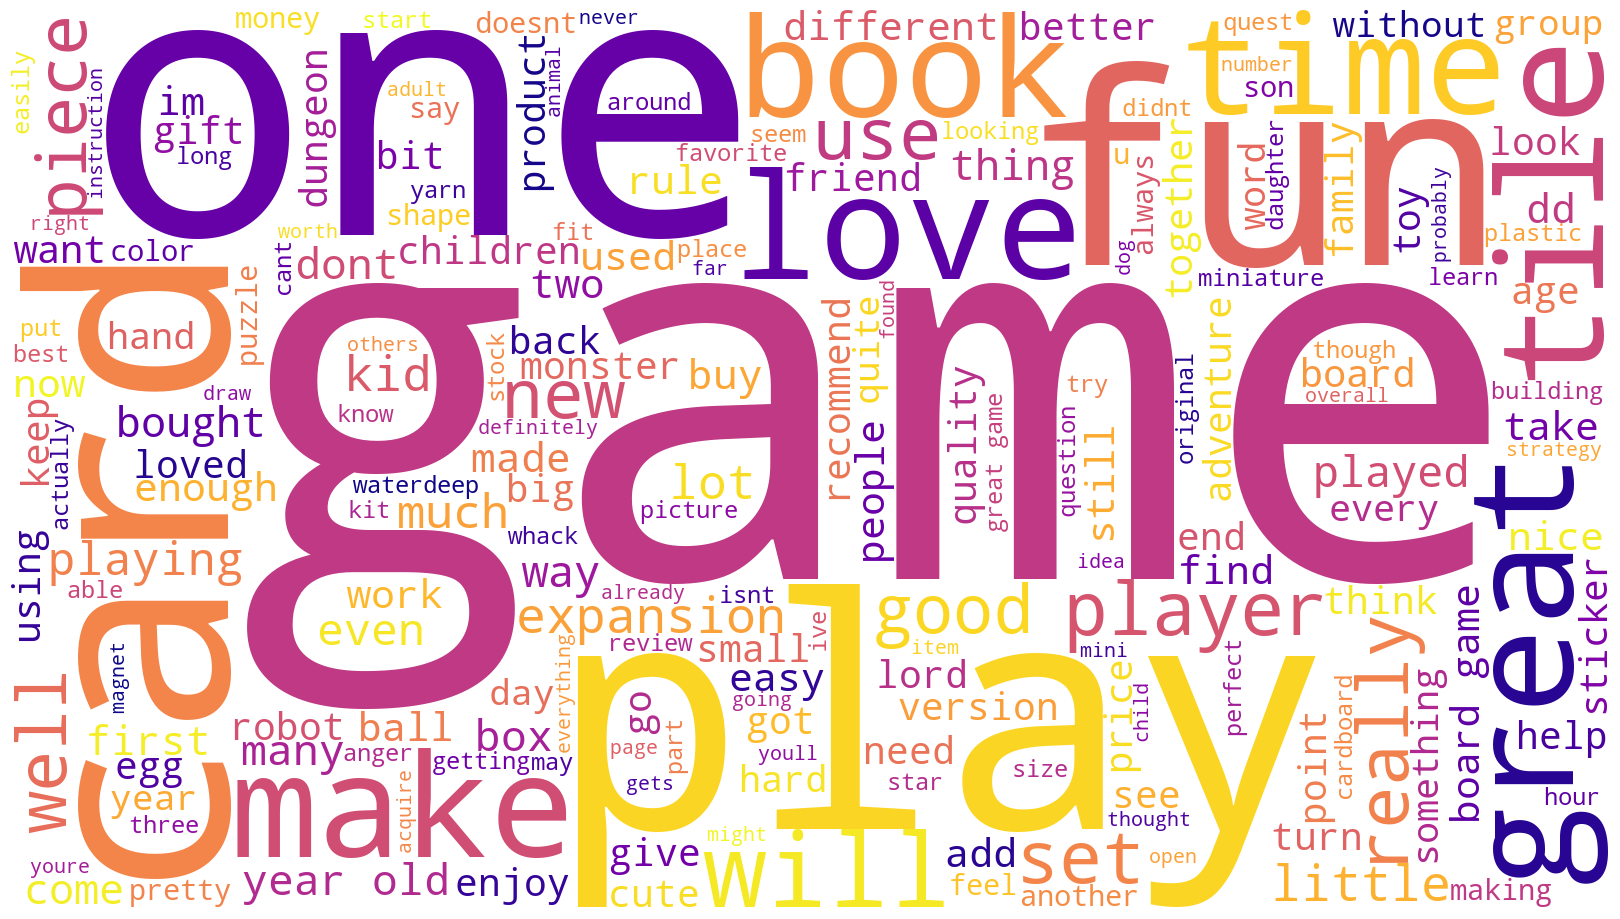

In [86]:
# Create a wordcloud without stop words for reviews.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_review2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


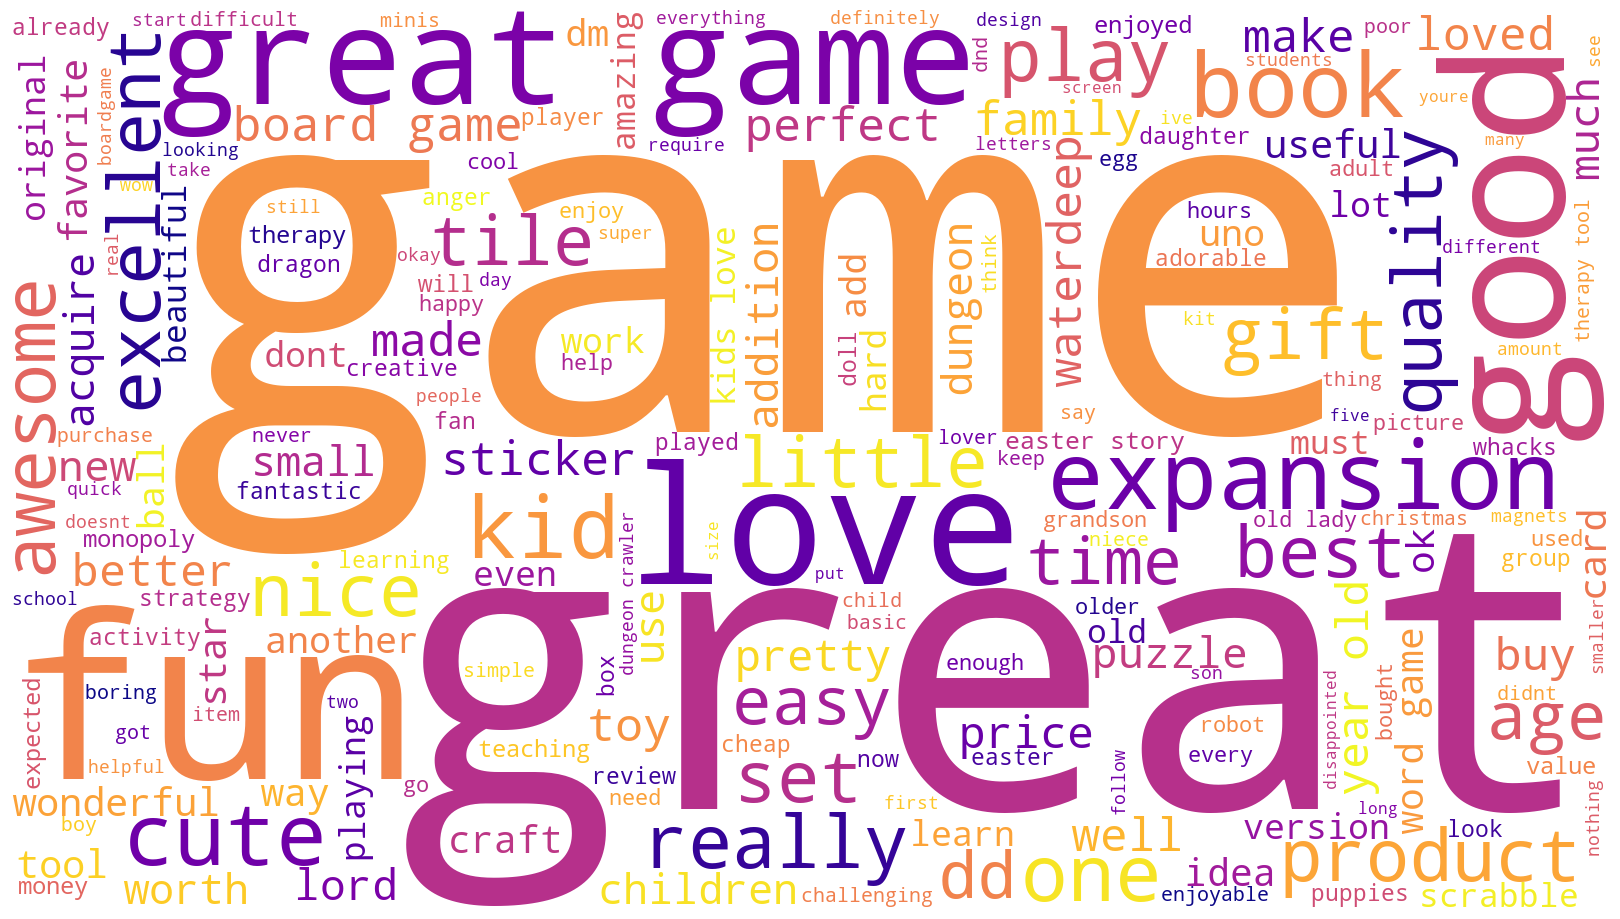

In [87]:
# Create a wordcloud without stop words for reviews.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_summary2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


A word cloud can indicate the frequency distribution of specific words. Word clouds are used in the exploratory phase, or as a communication tool to introduce concepts to stakeholders, but from the visualisation it is clear they offer limited analytic insights.

### 4d) Identify 15 most common words and polarity

In [88]:
# Determine the 15 most common words.
# Calculate the frequency distribution for review.
fdist_review1 = FreqDist(tokens_review2)

# Preview data.
fdist_review1

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 391, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [89]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens_review2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,391
like,373
get,293
cards,281
tiles,280


A dataframe to show more accurate frequency of words that give greater insight.

In [90]:
# Calculate the frequency distribution for review.
fdist_summary1 = FreqDist(tokens_summary2)

# Preview data.
fdist_summary1

FreqDist({'game': 268, 'great': 236, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [91]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens_summary2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

,Frequency
Word,
game,268
great,236
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


Dataframes to show more accurate frequency of words that give greater insight into reviews and summaries.

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [92]:
# Provided function.
def generate_polarity(r):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [93]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/davidgandary/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

In [95]:
# View the dateframe
df4_copy.head()

,index,review,summary
0,0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [96]:
# Determine polarity of both columns. 
polarity_review = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df4_copy['review']}

# View output.
df_polarity_review = pd.DataFrame(polarity_review).T

# View the DataFrame.
(df_polarity_review)

,neg,neu,pos,compound
when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely,0.108,0.833,0.059,-0.6333
an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,0.101,0.695,0.205,0.9404
nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm giants one is decent for a few tables it includes but really misses the mark maybe they should ask a few dms what they would use,0.136,0.711,0.153,-0.0045
amazing buy bought it as a gift for our new dm and its perfect,0.000,0.490,0.510,0.8860
as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money,0.203,0.797,0.000,-0.6808
...,...,...,...,...
this is a fun card game for people who like words and the artwork on the cards for each letter is absolutely beautiful try it,0.000,0.678,0.322,0.8748
fun for the family just make certain you agree on the dictionary up front it makes a big difference,0.000,0.655,0.345,0.7845
great game to keep the mind active we play it with my 87 year old motherinlaw we dont adhere strictly to the rules we sometimes help each other rearrange their letters to get higher scores everyone likes higher scores the strategy to remember is the bonus points for longest work or most words,0.000,0.721,0.279,0.9531
we are retired and find this a great way to stay alert in our spelling and vocabulary we also need to use math to keep score a great game for the brain,0.000,0.693,0.307,0.9178


In [97]:
# Determine polarity of both columns. 
polarity_summary = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df4_copy['summary']}

# View output.
df_polarity_summary = pd.DataFrame(polarity_review).T

# View the DataFrame.
(df_polarity_review)

,neg,neu,pos,compound
when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely,0.108,0.833,0.059,-0.6333
an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,0.101,0.695,0.205,0.9404
nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm giants one is decent for a few tables it includes but really misses the mark maybe they should ask a few dms what they would use,0.136,0.711,0.153,-0.0045
amazing buy bought it as a gift for our new dm and its perfect,0.000,0.490,0.510,0.8860
as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money,0.203,0.797,0.000,-0.6808
...,...,...,...,...
this is a fun card game for people who like words and the artwork on the cards for each letter is absolutely beautiful try it,0.000,0.678,0.322,0.8748
fun for the family just make certain you agree on the dictionary up front it makes a big difference,0.000,0.655,0.345,0.7845
great game to keep the mind active we play it with my 87 year old motherinlaw we dont adhere strictly to the rules we sometimes help each other rearrange their letters to get higher scores everyone likes higher scores the strategy to remember is the bonus points for longest work or most words,0.000,0.721,0.279,0.9531
we are retired and find this a great way to stay alert in our spelling and vocabulary we also need to use math to keep score a great game for the brain,0.000,0.693,0.307,0.9178


The outputs indicate the positive, neutral, and negative sentiments of each of the sentences.

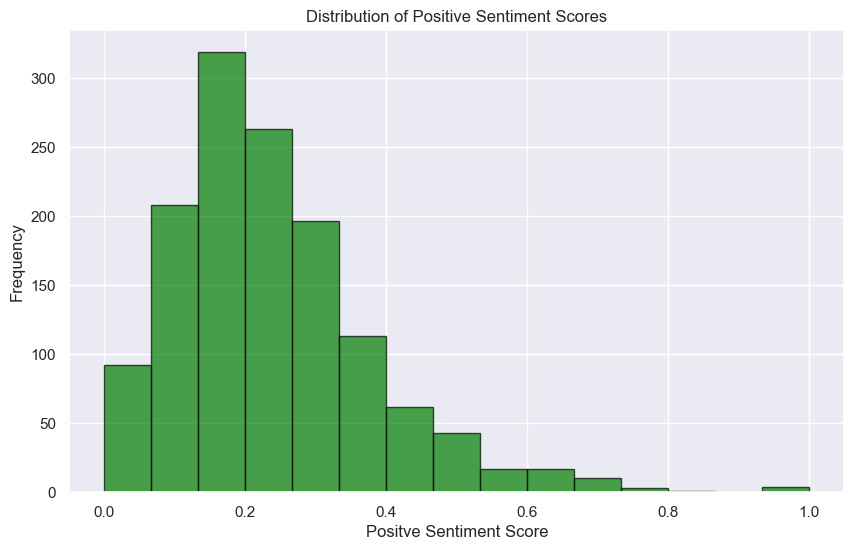

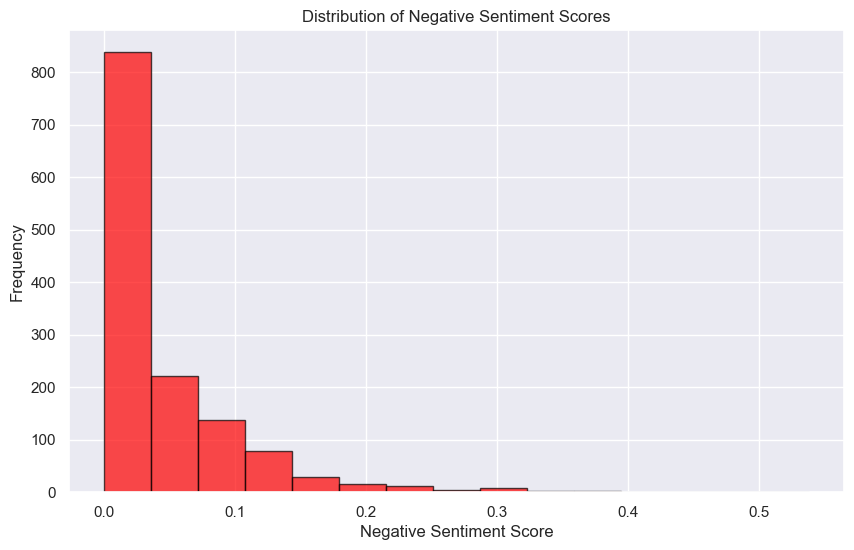

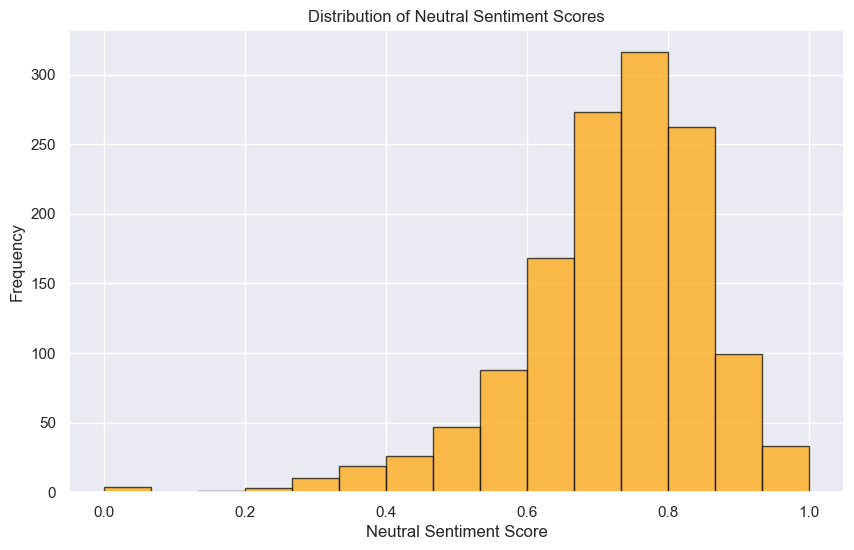

In [98]:
# Review: Histograms
# Histogram of Polarity for Positve
sorted_positve_scores = df_polarity_review['pos'].sort_values().reset_index(drop=True)

# Create a histogram with 15 bins
plt.figure(figsize=(10, 6))
plt.hist(sorted_positve_scores, bins=15, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Positive Sentiment Scores')
plt.xlabel('Positve Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Histogram of Polarity for Negative
sorted_negative_scores = df_polarity_review['neg'].sort_values().reset_index(drop=True)

# Create a histogram with 15 bins
plt.figure(figsize=(10, 6))
plt.hist(sorted_negative_scores, bins=15, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of Negative Sentiment Scores')
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Frequency')
plt.show()


# Histogram of Polarity for Neutral
sorted_neutral_scores = df_polarity_review['neu'].sort_values().reset_index(drop=True)

# Create a histogram with 15 bins
plt.figure(figsize=(10, 6))
plt.hist(sorted_neutral_scores, bins=15, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Neutral Sentiment Scores')
plt.xlabel('Neutral Sentiment Score')
plt.ylabel('Frequency')
plt.show()


By reviewing the polarity of the review column the distribution of the positve and negative sentiment scores both histograms seem to deviate towards 0. This can be interepreted as the reviews being overall neither positve or negative.

Therefore we can look at the neutral sentiment score where the distribution deviates towards 1 meaning that they are more emotionally neutral. 

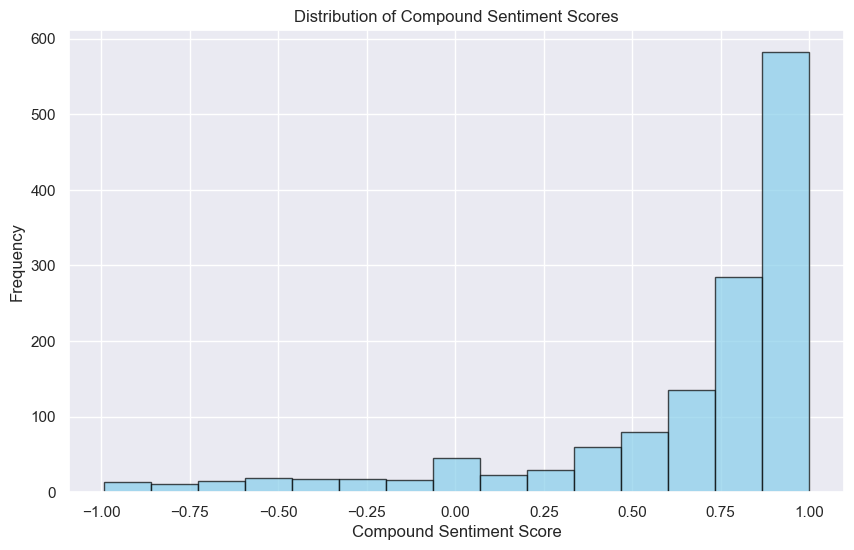

In [99]:
# Histogram of sentiment score
# Sort the compound sentiment scores
sorted_compound_scores = df_polarity_review['compound'].sort_values().reset_index(drop=True)

# Create a histogram with 15 bins
plt.figure(figsize=(10, 6))
plt.hist(sorted_compound_scores, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Values closer to 1 indicate very positive sentiment, while values closer to -1 indicate very negative sentiment. So looking at the distribution of the histogram is can be interpreted that the reviews are mostly written with positve sentiment.


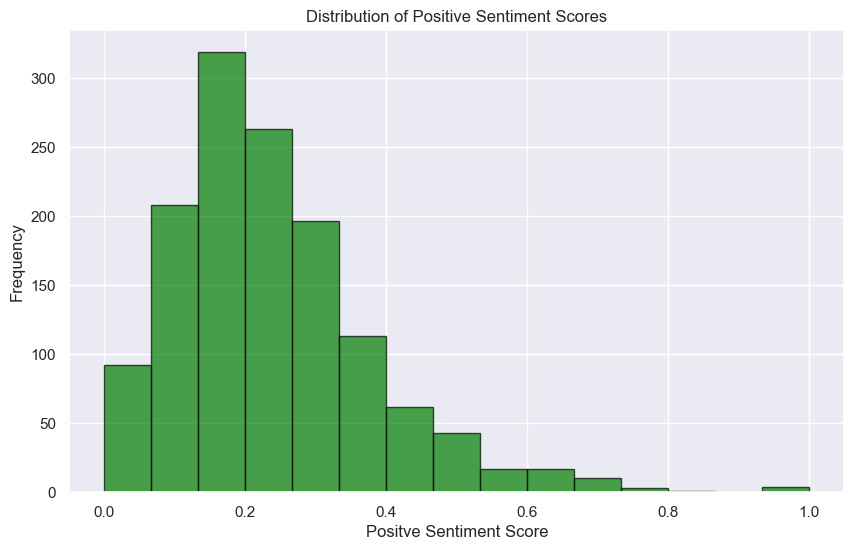

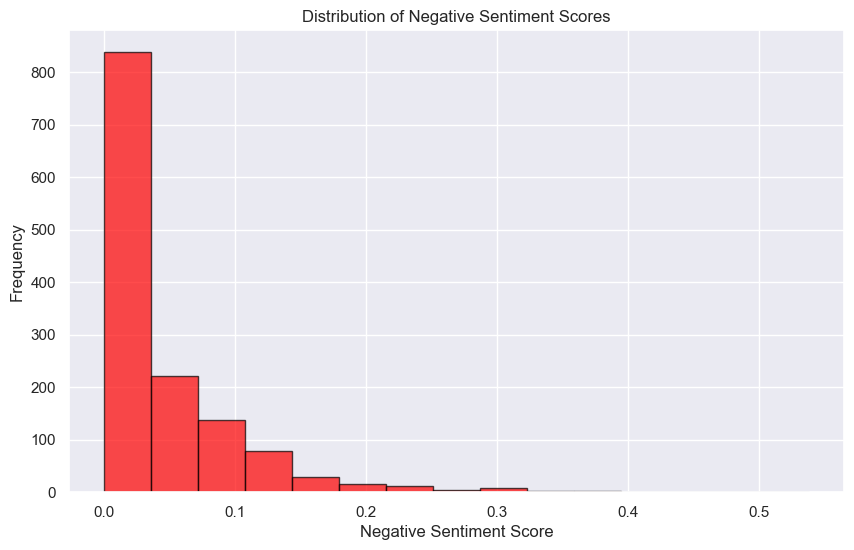

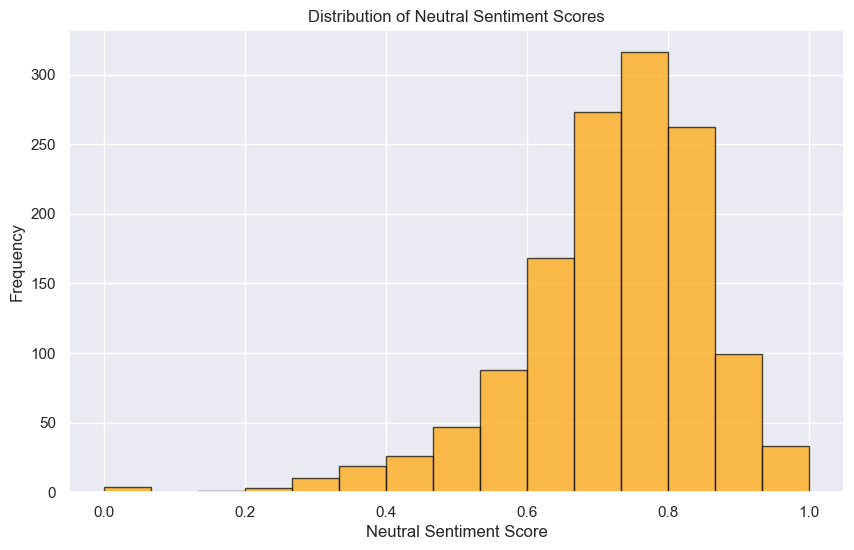

In [100]:
# Summary: Histograms
# Histogram of Polarity for Positve
sorted_positve_scores = df_polarity_summary['pos'].sort_values().reset_index(drop=True)

# Create a histogram with 15 bins
plt.figure(figsize=(10, 6))
plt.hist(sorted_positve_scores, bins=15, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Positive Sentiment Scores')
plt.xlabel('Positve Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Histogram of Polarity for Negative
sorted_negative_scores = df_polarity_summary['neg'].sort_values().reset_index(drop=True)

# Create a histogram with 15 bins
plt.figure(figsize=(10, 6))
plt.hist(sorted_negative_scores, bins=15, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of Negative Sentiment Scores')
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Frequency')
plt.show()


# Histogram of Polarity for Neutral
sorted_neutral_scores = df_polarity_summary['neu'].sort_values().reset_index(drop=True)

# Create a histogram with 15 bins
plt.figure(figsize=(10, 6))
plt.hist(sorted_neutral_scores, bins=15, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Neutral Sentiment Scores')
plt.xlabel('Neutral Sentiment Score')
plt.ylabel('Frequency')
plt.show()


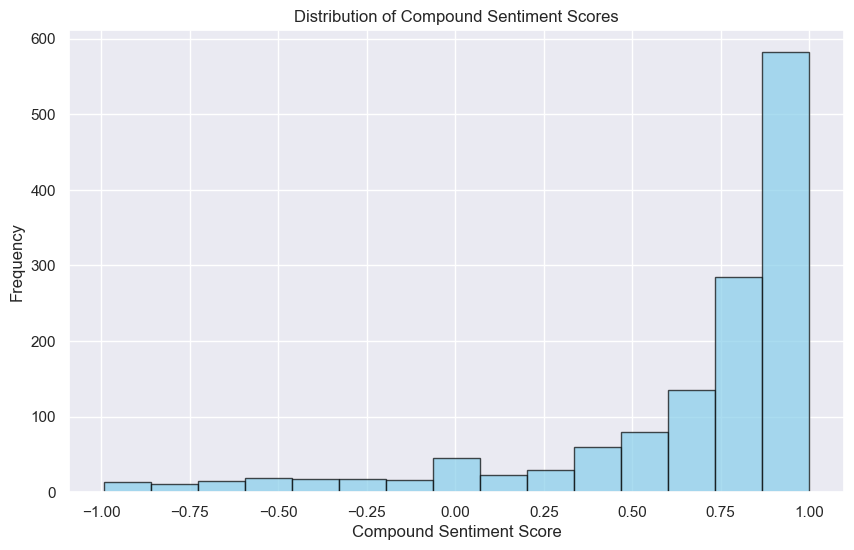

In [101]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of sentiment score
# Sort the compound sentiment scores
sorted_compound_scores = df_polarity_summary['compound'].sort_values().reset_index(drop=True)

# Create a histogram with 15 bins
plt.figure(figsize=(10, 6))
plt.hist(sorted_compound_scores, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

A key observation is that the compound sentiment scores deviate towards 1 which indicate a more postive sentiment in the summaries written.

There is an outlier with sentiment scores of 0 occuring a high number of times, scores close to 0 indicate neutral or mixed sentiment, so there is a number of summaries which are to be taken as neutral.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [102]:
# Top 20 negative reviews.
df_polarity_review.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
incomplete kit very disappointing,0.538,0.462,0.000,-0.5413
a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,0.487,0.455,0.058,-0.9052
got the product in damaged condition,0.367,0.633,0.000,-0.4404
i bought this thinking it would be really fun but i was disappointed its really messy and it isnt nearly as easy as it seems also the glue is useless for a 9 year old the instructions are very difficult,0.362,0.592,0.045,-0.9520
not as easy as it looks,0.325,0.675,0.000,-0.3412
we really did not enjoy this game,0.325,0.675,0.000,-0.4389
hard to put together,0.318,0.682,0.000,-0.1027
my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,0.318,0.613,0.069,-0.8674
easytouse great for anger management groups,0.314,0.339,0.347,0.1027
its ok but loses its luster quickly,0.309,0.524,0.168,-0.3291


Dataframe which displays top 20 negative reviews based on negative sentiment score in descending order. 

When analysing last 20th rated review this appears to clearly be negative, but only has a negative sentiment score of 0.236,, but has a compound score of -0.8067. This speaks to the accuracy of looking at the compound sentiment scores to get a better reflection of peoples emotions through text.

In [103]:
# Top 20 negative summaries.
df_polarity_summary.sort_values('neg', ascending=0).head(20)



,neg,neu,pos,compound
incomplete kit very disappointing,0.538,0.462,0.000,-0.5413
a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,0.487,0.455,0.058,-0.9052
got the product in damaged condition,0.367,0.633,0.000,-0.4404
i bought this thinking it would be really fun but i was disappointed its really messy and it isnt nearly as easy as it seems also the glue is useless for a 9 year old the instructions are very difficult,0.362,0.592,0.045,-0.9520
not as easy as it looks,0.325,0.675,0.000,-0.3412
we really did not enjoy this game,0.325,0.675,0.000,-0.4389
hard to put together,0.318,0.682,0.000,-0.1027
my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,0.318,0.613,0.069,-0.8674
easytouse great for anger management groups,0.314,0.339,0.347,0.1027
its ok but loses its luster quickly,0.309,0.524,0.168,-0.3291


Dataframe which displays top 20 negative summary based on negative sentiment score in descending order.

Common negative emotion expressed can be described as disappointment or something that is underwhelming.

In [104]:
# Top 20 positive reviews.
df_polarity_review.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
cute,0.0,0.000,1.000,0.4588
perfect,0.0,0.000,1.000,0.5719
fun gift,0.0,0.000,1.000,0.7351
entertaining,0.0,0.000,1.000,0.4404
fun good service,0.0,0.139,0.861,0.7351
its fun,0.0,0.233,0.767,0.5106
very cute,0.0,0.233,0.767,0.5095
liked it,0.0,0.263,0.737,0.4215
a fun game we enjoy it a great deal,0.0,0.274,0.726,0.8910
i like pie,0.0,0.286,0.714,0.3612


Dataframe which displays top 20 positve reviews based on postive sentiment score in descending order.

In [105]:
# Top 20 positive summaries.
df_polarity_summary.sort_values('pos', ascending=0).head(20)


,neg,neu,pos,compound
cute,0.0,0.000,1.000,0.4588
perfect,0.0,0.000,1.000,0.5719
fun gift,0.0,0.000,1.000,0.7351
entertaining,0.0,0.000,1.000,0.4404
fun good service,0.0,0.139,0.861,0.7351
its fun,0.0,0.233,0.767,0.5106
very cute,0.0,0.233,0.767,0.5095
liked it,0.0,0.263,0.737,0.4215
a fun game we enjoy it a great deal,0.0,0.274,0.726,0.8910
i like pie,0.0,0.286,0.714,0.3612


Dataframe which displays top 20 positve summaries based on postive sentiment score in descending order.

## 7. Discuss: Insights and observations

***Your observations here...***

As previously mentioned it may be more accurate to analyse the compound sentiment score to assess true sentiments, however the compound sentiment score can be used alongside the positive sentiment score to tell a story of the true intentions behind the positive summary as for example a summary 'ok' may have a positive score of 1 but only have a compound score of 0.2960, telling us that the review may not be as positive as we think in its real context.

The top 3 summaries based on compound scores (as top 20 are all 1.0) are 'super fun', 'great gift', 'great helper'. These summaries give great insight into how the games affect consumers positively, which can lead to more focus in marketing the games in this way to new potential consumers based on summaries.


# 